In [1]:
# Import dependencies
import pandas as pd

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
X = df.drop('koi_disposition',axis=1)
y = df['koi_disposition']

[0.13570623 0.16061567 0.13170968 0.04836323 0.01702224 0.01311916
 0.01287639 0.01259777 0.02335046 0.02279951 0.01187504 0.01164956
 0.00969739 0.01777808 0.02958476 0.02628829 0.02370989 0.0132799
 0.01241216 0.01292415 0.01109256 0.01022264 0.01642865 0.00907874
 0.00926544 0.00848889 0.03241147 0.00841524 0.01082364 0.02127908
 0.01814997 0.01082487 0.01081114 0.01441532 0.00915061 0.0104924
 0.00911343 0.01150649 0.01025802 0.01041182]


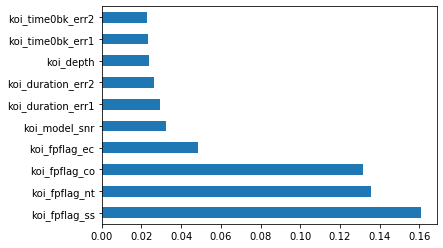

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [5]:
X = df[feat_importances.index]
y = df['koi_disposition']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.8506864988558352

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.8981693363844394

In [10]:
predictions = rf.predict(X_test_scaled)
df_pred = pd.DataFrame({"Actual":y_test, "Predicted":predictions}) 
df_pred.head()

,Actual,Predicted
4982,FALSE POSITIVE,FALSE POSITIVE
4866,CANDIDATE,CANDIDATE
2934,FALSE POSITIVE,FALSE POSITIVE
5007,FALSE POSITIVE,FALSE POSITIVE
3869,FALSE POSITIVE,FALSE POSITIVE


In [11]:
from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV model
param_grid = {'n_estimators':[200, 400, 600, 800, 1000],
             'max_depth':[5, 8, 15, 25, 30],
             'min_samples_split':[2, 5, 10],
             'min_samples_leaf':[1, 2, 4]}

grid = GridSearchCV(rf, param_grid, verbose=3)

In [12]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.872, total=   1.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.871, total=   1.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.864, total=   1.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.843, total=   1.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.858, total=   1.7s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.874, total=   2.9s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.865, total=   3.1s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.867,

[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.870, total=   7.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.849, total=   7.3s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.859, total=   7.2s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.874, total=   1.5s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.855, total=   1.4s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, s

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.869, total=   6.3s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.850, total=   6.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.862, total=   6.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.876, total=   8.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.866, total=   8.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=

[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.870, total=   4.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.847, total=   4.4s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.857, total=   4.5s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.875, total=   6.2s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.869, total=   5.9s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=800, s

[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.868, total=   2.9s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.846, total=   2.9s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.854, total=   2.8s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.874, total=   4.2s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.872, total=   4.3s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.867,

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.881, total=   1.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.867, total=   1.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.872, total=   1.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.899, total=   3.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.897, total=   3.8s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.887,

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.886, total=   9.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.871, total=   9.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.874, total=   9.5s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.889, total=   1.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.890, total=   1.9s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=10, n_estimators=200, s

[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.888, total=   7.9s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.870, total=   8.0s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.873, total=   7.6s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.896, total=   9.4s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.894, total=   9.4s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=

[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.886, total=   5.7s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.872, total=   5.6s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.874, total=   5.7s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.893, total=   7.6s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.895, total=   7.7s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=800, s

[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.886, total=   3.7s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.866, total=   3.7s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.873, total=   3.8s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.892, total=   5.8s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.893, total=   5.7s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.886,

[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.885, total=   2.6s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.881, total=   2.4s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.884, total=   2.5s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.902, total=   5.1s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.907, total=   5.0s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=400, s

[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.888, total=  12.6s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.883, total=  12.2s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.883, total=  12.3s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.904, total=   2.5s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.904, total=   2.5s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estima

[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.888, total=   9.9s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.880, total=   9.7s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.883, total=   9.9s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.901, total=  12.3s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.907, total=  12.4s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=1

[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.889, total=   7.3s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.883, total=   7.2s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.879, total=   7.3s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.903, total=   9.7s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.905, total=   9.8s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estima

[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.888, total=   4.8s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.881, total=   4.7s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.878, total=   4.7s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.901, total=   7.2s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.902, total=   7.0s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=600, s

[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.889, total=   2.7s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.880, total=   2.7s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.884, total=   2.7s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.901, total=   5.4s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.905, total=   5.4s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=400, s

[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.888, total=  14.0s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.882, total=  13.8s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.885, total=  14.2s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.898, total=   2.7s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.904, total=   2.7s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estima

[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.889, total=  11.2s
[CV] max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.885, total=  10.9s
[CV] max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.883, total=  11.0s
[CV] max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.899, total=  13.7s
[CV] max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.905, total=  13.7s
[CV] max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=2, n_estimators=1

[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.888, total=   7.9s
[CV] max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.884, total=   7.6s
[CV] max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.885, total=   8.2s
[CV] max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.899, total=  11.1s
[CV] max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.904, total=  10.8s
[CV] max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estima

[CV]  max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.888, total=   5.0s
[CV] max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.877, total=   5.1s
[CV] max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.881, total=   5.2s
[CV] max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.903, total=   7.8s
[CV] max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.904, total=   7.7s
[CV] max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=600, s

[CV]  max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.883, total=   2.7s
[CV] max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.882, total=   2.7s
[CV] max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.883, total=   2.8s
[CV] max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.901, total=   5.6s
[CV] max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.909, total=   5.6s
[CV] max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=400, s

[CV]  max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.888, total=  14.1s
[CV] max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.886, total=  13.7s
[CV] max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=1000, score=0.885, total=  13.8s
[CV] max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.904, total=   2.9s
[CV] max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.901, total=   2.8s
[CV] max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estima

[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.889, total=  10.9s
[CV] max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.881, total=  10.9s
[CV] max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=800 
[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=800, score=0.882, total=  10.8s
[CV] max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.902, total=  14.2s
[CV] max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, score=0.903, total=  14.1s
[CV] max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1

[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.889, total=   8.0s
[CV] max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.882, total=   8.0s
[CV] max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=600, score=0.885, total=   8.4s
[CV] max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.898, total=  11.3s
[CV] max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=800, score=0.907, total=  10.7s
[CV] max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estima

[CV]  max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.887, total=   5.1s
[CV] max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.880, total=   5.0s
[CV] max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=400 
[CV]  max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=400, score=0.882, total=   5.1s
[CV] max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.903, total=   7.7s
[CV] max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=600, score=0.902, total=   7.6s
[CV] max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=600 
[CV]  max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=600, s

[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed: 129.6min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             verbose=3)

In [13]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
0.8941412759516515


In [14]:
import joblib
filename = 'trees.sav'
joblib.dump(grid, filename)

['trees.sav']